In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/predict-diabities/diabetes.csv
/kaggle/input/diabetes/diabetes.csv
/kaggle/input/diabetes-prediction-dataset/diabetes_prediction_dataset.csv
/kaggle/input/diabetes-health-indicators-dataset/diabetes_binary_5050split_health_indicators_BRFSS2015.csv
/kaggle/input/diabetes-health-indicators-dataset/diabetes_binary_health_indicators_BRFSS2015.csv
/kaggle/input/diabetes-health-indicators-dataset/diabetes_012_health_indicators_BRFSS2015.csv
/kaggle/input/pima-indians-diabetes-database/diabetes.csv


In [9]:
df= pd.read_csv('/kaggle/input/diabetes-health-indicators-dataset/diabetes_binary_5050split_health_indicators_BRFSS2015.csv')
df1= pd.read_csv('/kaggle/input/diabetes-health-indicators-dataset/diabetes_binary_health_indicators_BRFSS2015.csv')
df2= pd.read_csv('/kaggle/input/diabetes-health-indicators-dataset/diabetes_012_health_indicators_BRFSS2015.csv')

In [10]:
df.head()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,3.0,5.0,30.0,0.0,1.0,4.0,6.0,8.0
1,0.0,1.0,1.0,1.0,26.0,1.0,1.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,12.0,6.0,8.0
2,0.0,0.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,10.0,0.0,1.0,13.0,6.0,8.0
3,0.0,1.0,1.0,1.0,28.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,3.0,0.0,3.0,0.0,1.0,11.0,6.0,8.0
4,0.0,0.0,0.0,1.0,29.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,8.0,5.0,8.0


In [11]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming data is loaded in a DataFrame called `data`
# Example: data = pd.read_csv('BRFSS_2015.csv')

# Set a consistent style for all plots
sns.set(style="whitegrid")

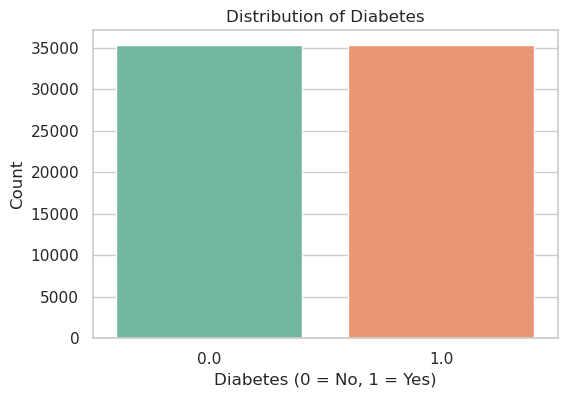

In [12]:
# Bar plot for Diabetes_binary (0 = No, 1 = Yes)
plt.figure(figsize=(6, 4))
sns.countplot(x='Diabetes_binary', data=df, palette='Set2')
plt.title('Distribution of Diabetes')
plt.xlabel('Diabetes (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()


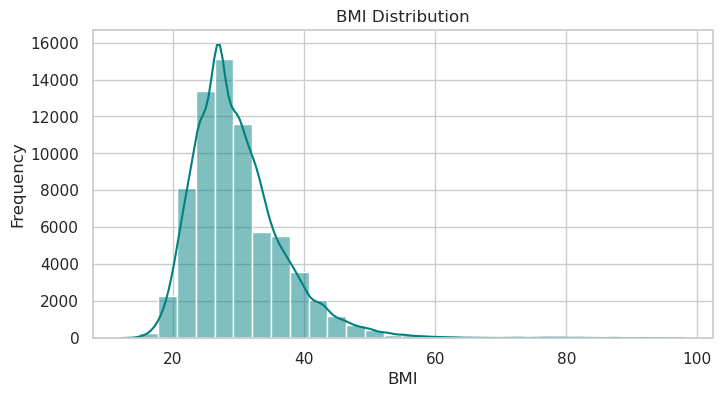

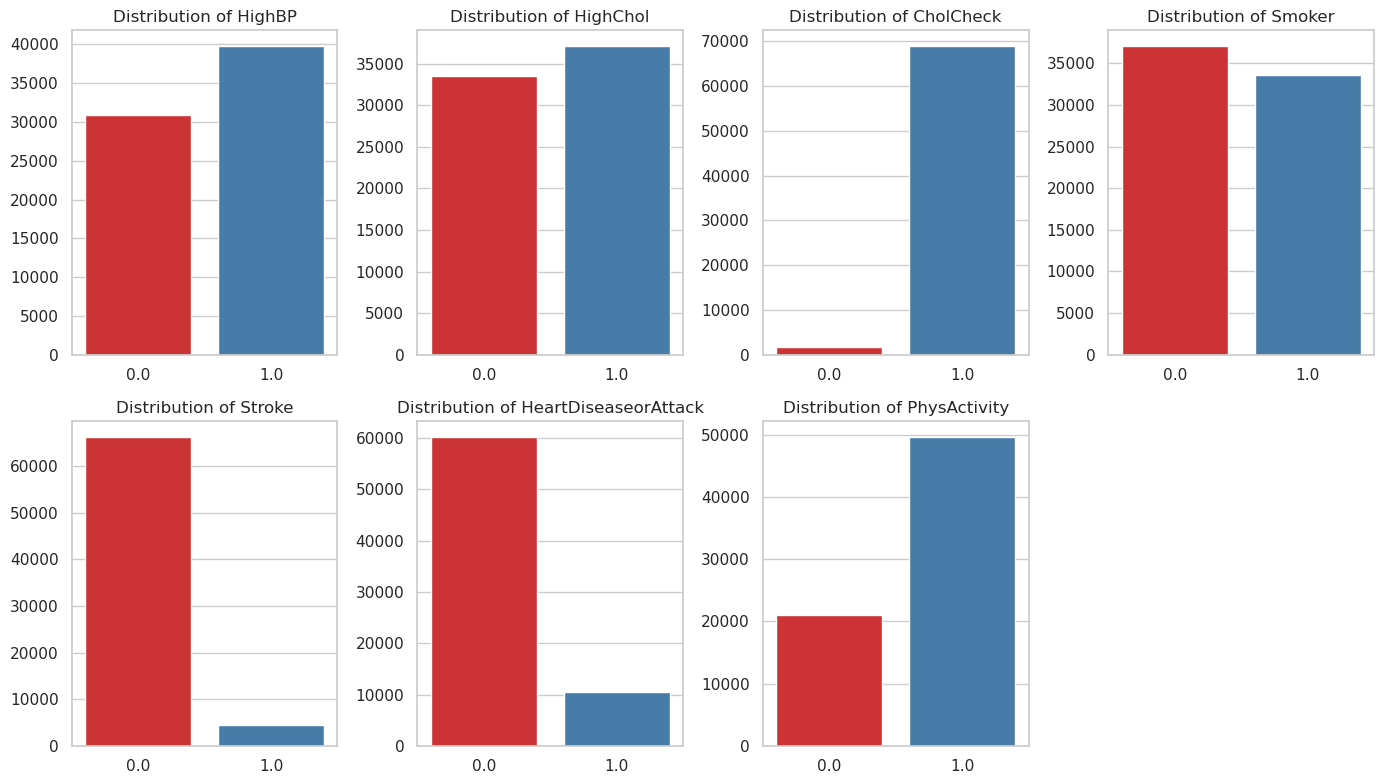

In [13]:
# Histogram for BMI
plt.figure(figsize=(8, 4))
sns.histplot(df['BMI'], kde=True, bins=30, color='teal')
plt.title('BMI Distribution')
plt.xlabel('BMI')
plt.ylabel('Frequency')
plt.show()

# Count plots for binary risk factors
binary_features = ['HighBP', 'HighChol', 'CholCheck', 'Smoker', 'Stroke', 'HeartDiseaseorAttack', 'PhysActivity']
plt.figure(figsize=(14, 8))
for i, feature in enumerate(binary_features, 1):
    plt.subplot(2, 4, i)
    sns.countplot(x=feature, data=df, palette='Set1')
    plt.title(f'Distribution of {feature}')
    plt.xlabel('')
    plt.ylabel('')
plt.tight_layout()
plt.show()


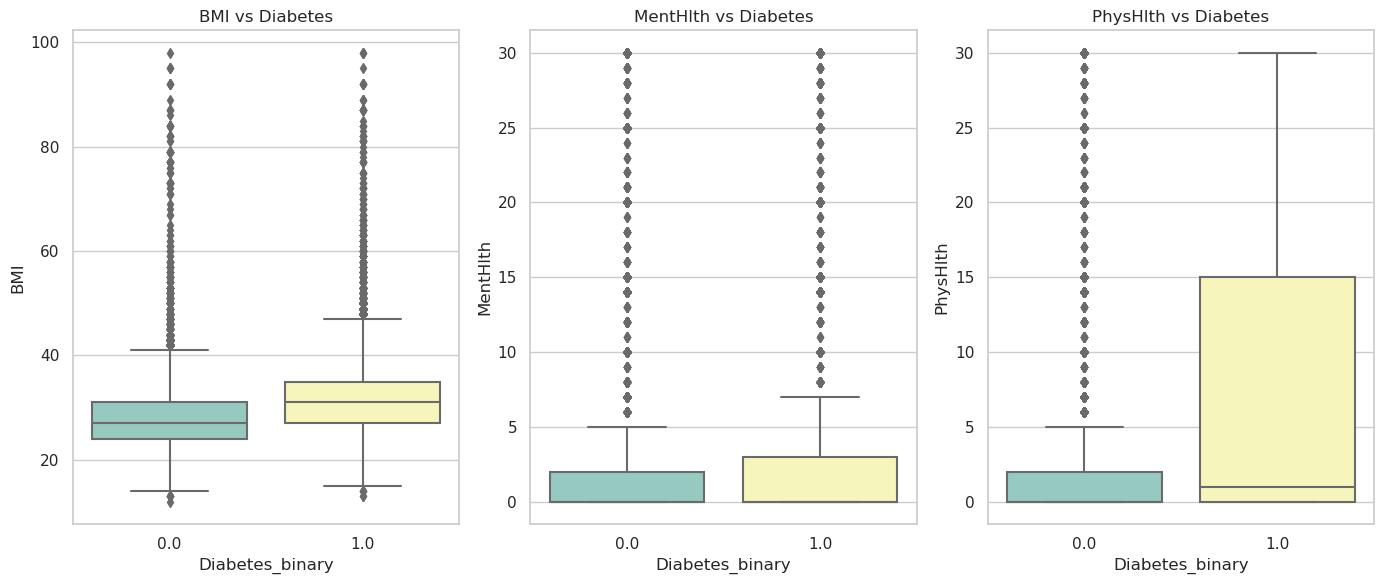

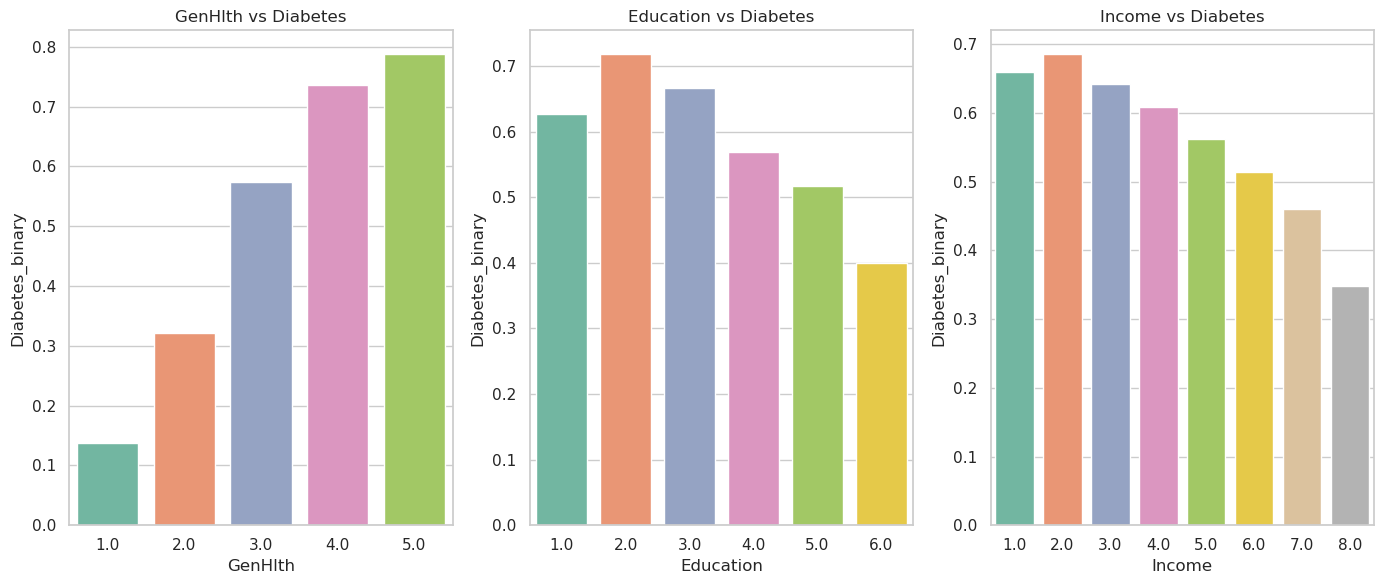

In [14]:
# Box plot for continuous features with Diabetes_binary
continuous_features = ['BMI', 'MentHlth', 'PhysHlth']
plt.figure(figsize=(14, 6))
for i, feature in enumerate(continuous_features, 1):
    plt.subplot(1, 3, i)
    sns.boxplot(x='Diabetes_binary', y=feature, data=df, palette='Set3')
    plt.title(f'{feature} vs Diabetes')
plt.tight_layout()
plt.show()

# Bar plot for ordinal features with Diabetes_binary
ordinal_features = ['GenHlth', 'Education', 'Income']
plt.figure(figsize=(14, 6))
for i, feature in enumerate(ordinal_features, 1):
    plt.subplot(1, 3, i)
    sns.barplot(x=feature, y='Diabetes_binary', data=df, palette='Set2', errorbar=None)
    plt.title(f'{feature} vs Diabetes')
plt.tight_layout()
plt.show()

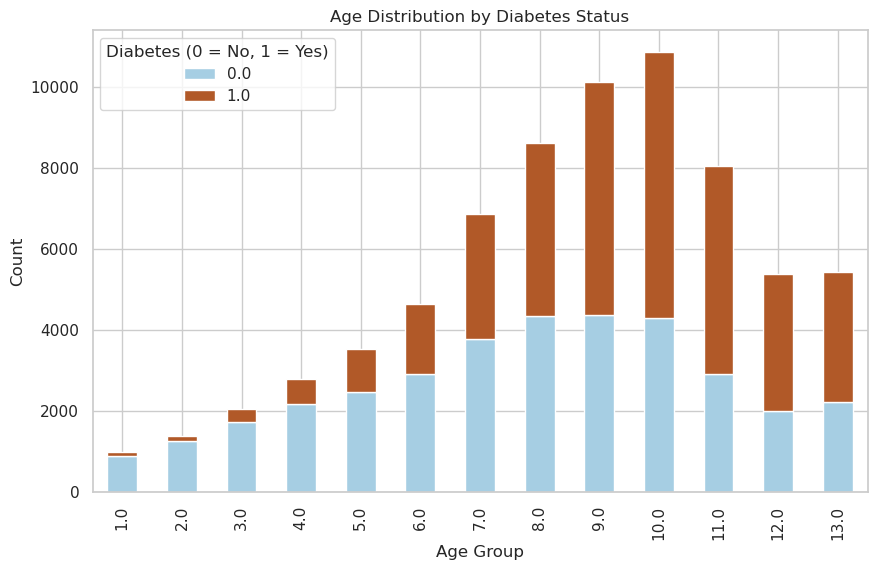

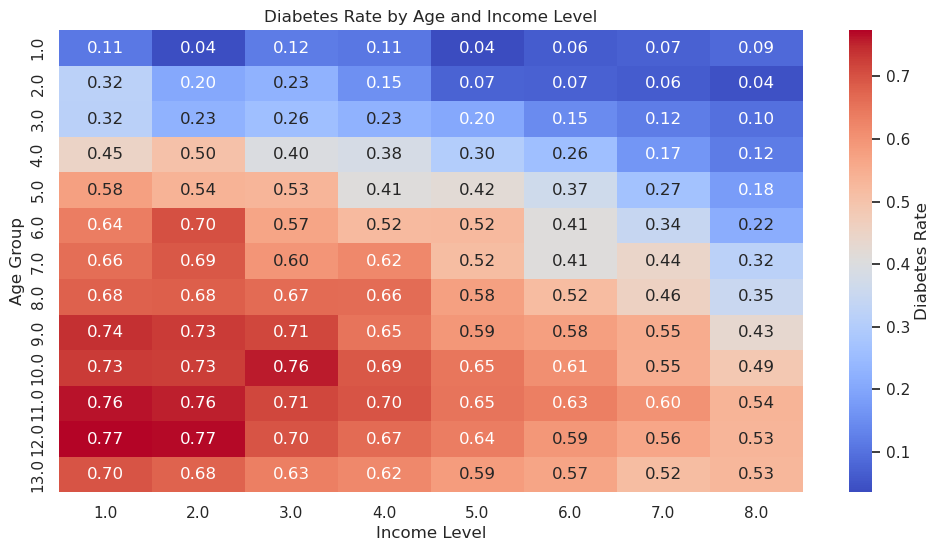

In [16]:
# Stacked bar plot for Age and Diabetes_binary
age_diabetes = pd.crosstab(df['Age'], df['Diabetes_binary'])
age_diabetes.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='Paired')
plt.title('Age Distribution by Diabetes Status')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.legend(title='Diabetes (0 = No, 1 = Yes)')
plt.show()

# Heatmap for Age and Income with Diabetes_binary
heatmap_data = df.groupby(['Age', 'Income'])['Diabetes_binary'].mean().unstack()
plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_data, annot=True, fmt=".2f", cmap='coolwarm', cbar_kws={'label': 'Diabetes Rate'})
plt.title('Diabetes Rate by Age and Income Level')
plt.xlabel('Income Level')
plt.ylabel('Age Group')
plt.show()


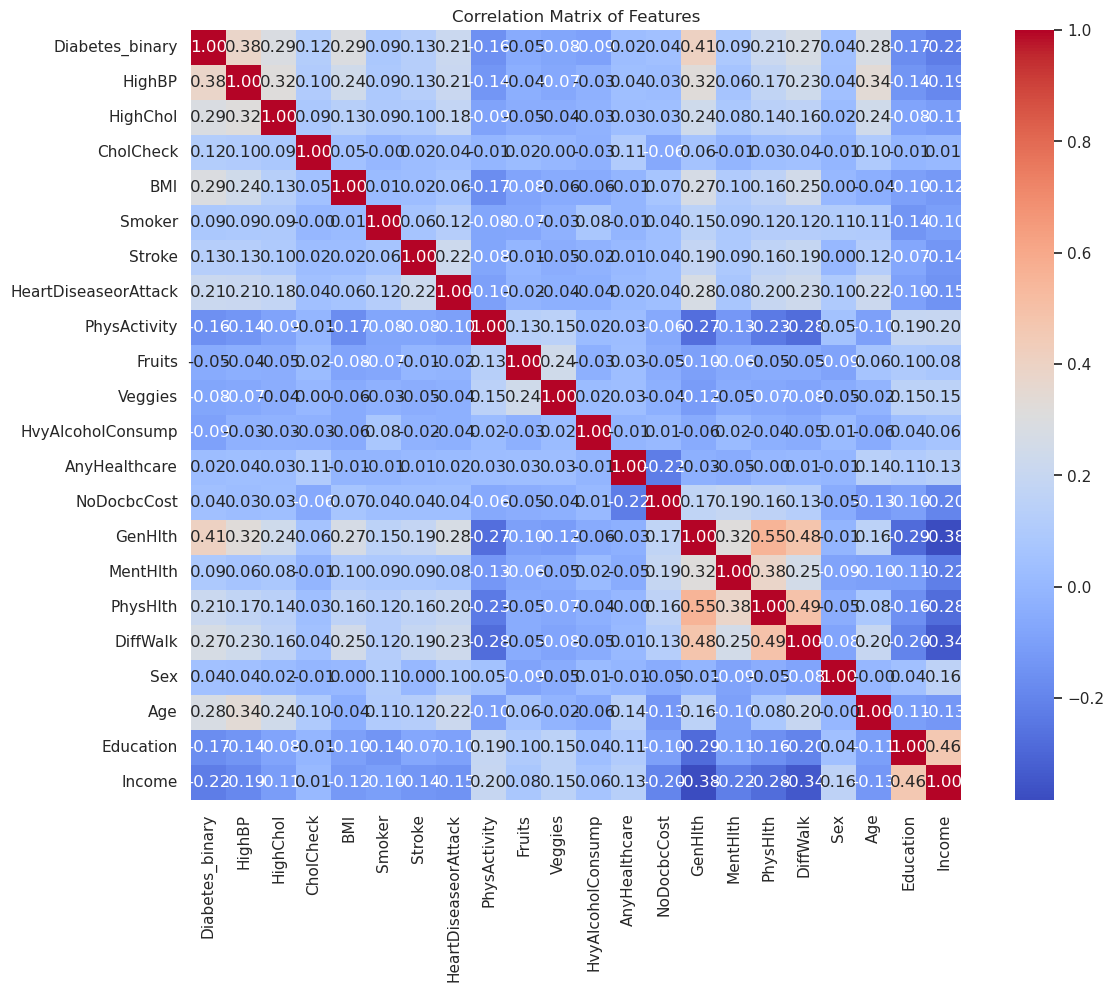

In [17]:
# Correlation matrix
plt.figure(figsize=(14, 10))
correlation = df.corr()
sns.heatmap(correlation, annot=True, fmt=".2f", cmap='coolwarm', cbar=True, square=True)
plt.title('Correlation Matrix of Features')
plt.show()


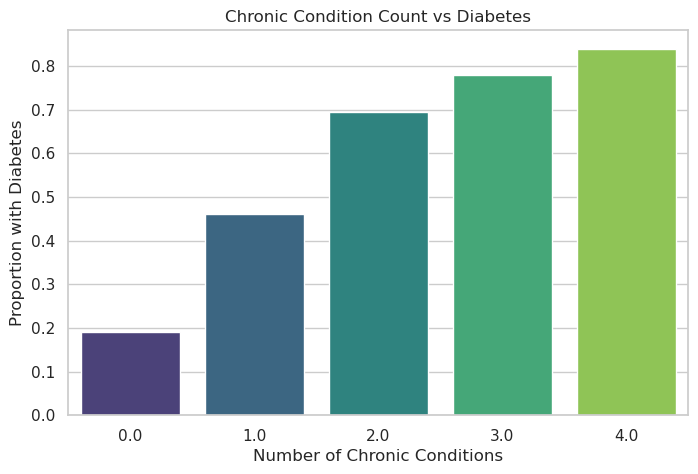

In [18]:
# Calculate chronic condition count
df['Chronic_Condition_Count'] = df[['HighBP', 'HighChol', 'Stroke', 'HeartDiseaseorAttack']].sum(axis=1)

# Bar plot for Chronic_Condition_Count vs Diabetes_binary
plt.figure(figsize=(8, 5))
sns.barplot(x='Chronic_Condition_Count', y='Diabetes_binary', data=df, palette='viridis', errorbar=None)
plt.title('Chronic Condition Count vs Diabetes')
plt.xlabel('Number of Chronic Conditions')
plt.ylabel('Proportion with Diabetes')
plt.show()


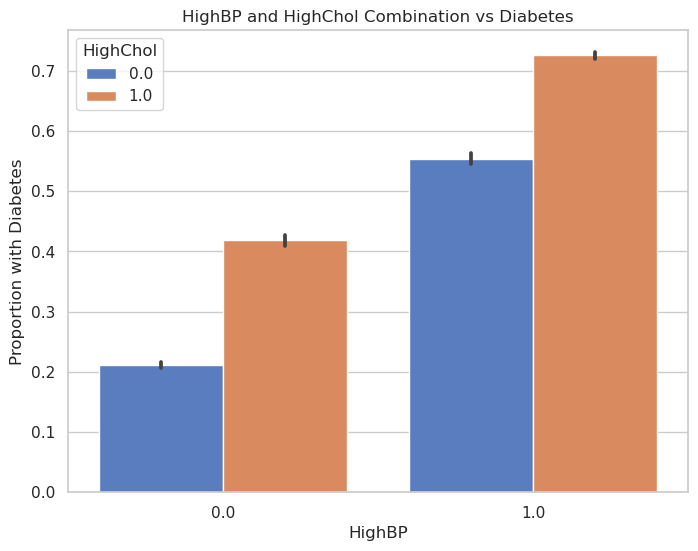

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


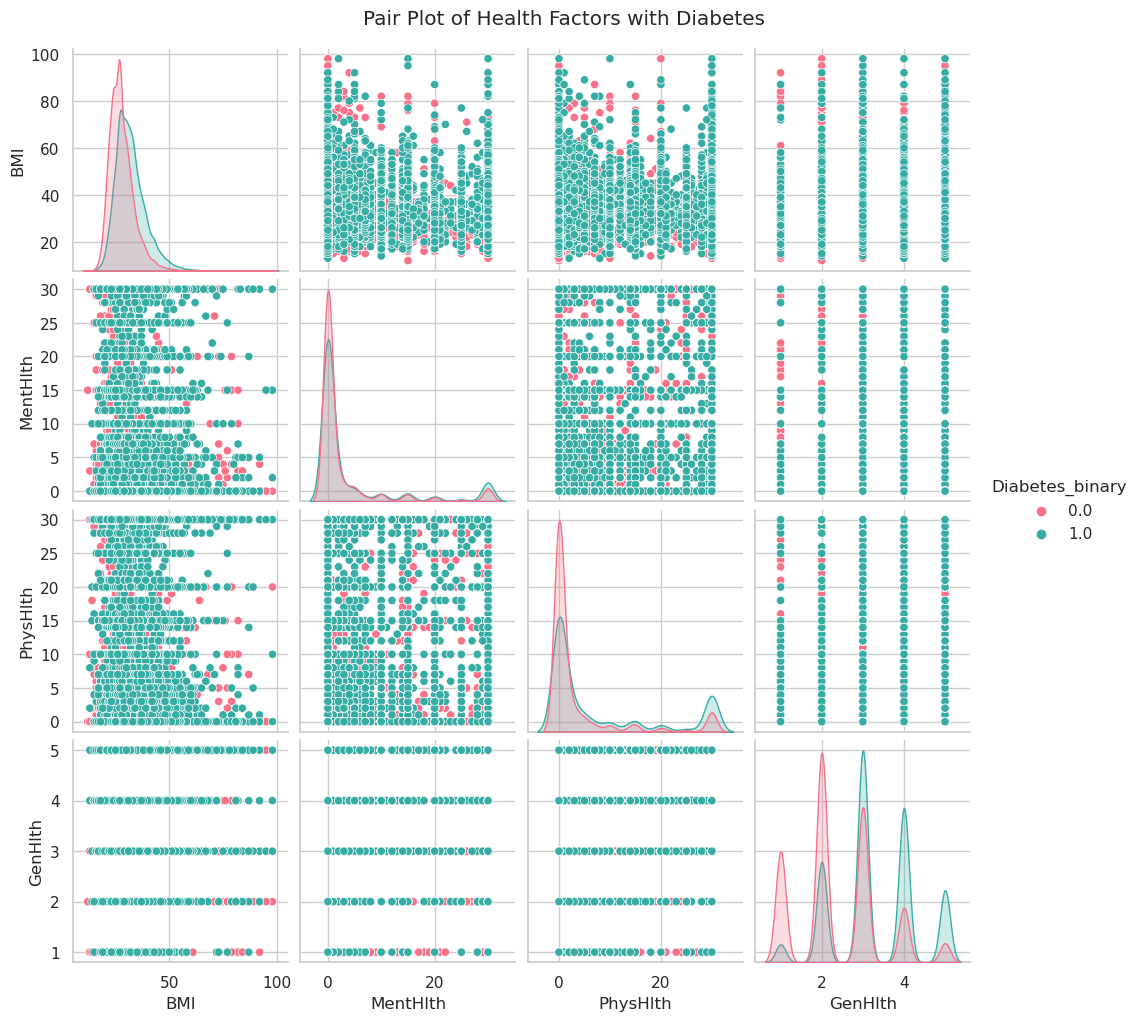

In [19]:
# Grouped bar plot for HighBP and HighChol combinations
plt.figure(figsize=(8, 6))
sns.barplot(x='HighBP', y='Diabetes_binary', hue='HighChol', data=df, palette='muted')
plt.title('HighBP and HighChol Combination vs Diabetes')
plt.xlabel('HighBP')
plt.ylabel('Proportion with Diabetes')
plt.legend(title='HighChol')
plt.show()

# Pair plot for continuous variables with Diabetes hue
sns.pairplot(df, vars=['BMI', 'MentHlth', 'PhysHlth', 'GenHlth'], hue='Diabetes_binary', palette='husl')
plt.suptitle('Pair Plot of Health Factors with Diabetes', y=1.02)
plt.show()


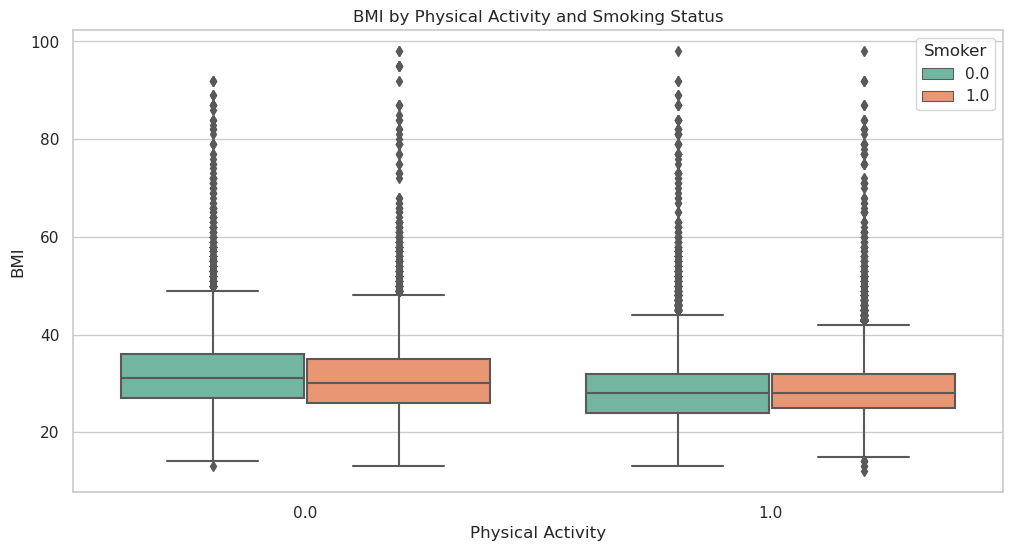

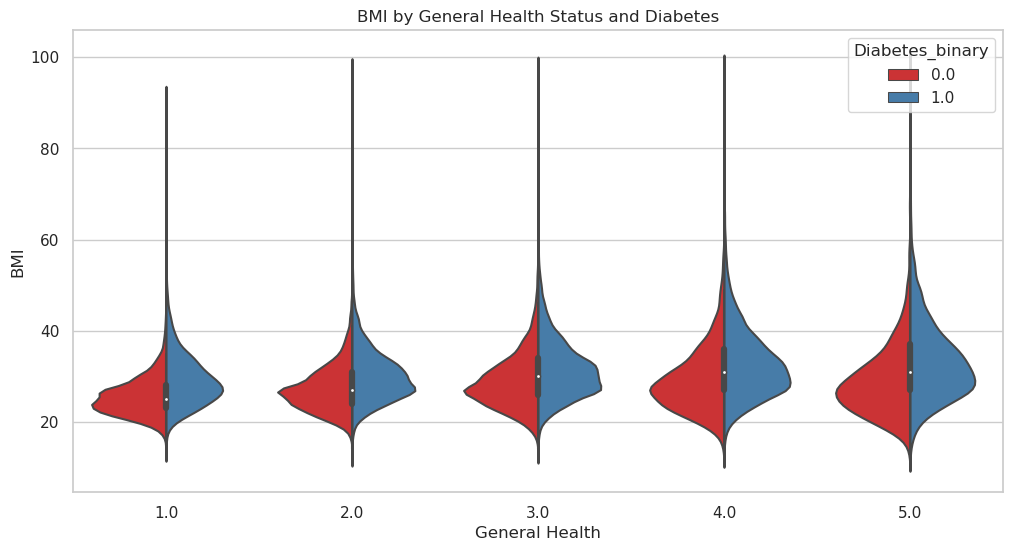

In [20]:
# Box plot for BMI across PhysActivity and Smoker status
plt.figure(figsize=(12, 6))
sns.boxplot(x='PhysActivity', y='BMI', hue='Smoker', data=df, palette='Set2')
plt.title('BMI by Physical Activity and Smoking Status')
plt.xlabel('Physical Activity')
plt.ylabel('BMI')
plt.legend(title='Smoker')
plt.show()

# Violin plot for BMI by GenHlth split by Diabetes_binary
plt.figure(figsize=(12, 6))
sns.violinplot(x='GenHlth', y='BMI', hue='Diabetes_binary', data=df, split=True, palette='Set1')
plt.title('BMI by General Health Status and Diabetes')
plt.xlabel('General Health')
plt.ylabel('BMI')
plt.show()


## Machine Learning

In [21]:
df1.head()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [ ]:
df1.columns

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
# Features and target variable
X = df.drop(columns=['Diabetes_binary'])  # Features
y = df['Diabetes_binary']                 # Target

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the dataset (important for models like Logistic Regression, SVM, and KNN)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Dictionary to store models and their results
models = {
    "Logistic Regression": LogisticRegression(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "Support Vector Machine": SVC(probability=True, random_state=42),
    "K-Nearest Neighbors": KNeighborsClassifier()
}

# Train and evaluate each model
results = {}
for name, model in models.items():
    if name in ["Logistic Regression", "Support Vector Machine", "K-Nearest Neighbors"]:
        model.fit(X_train_scaled, y_train)  # Use scaled features for these models
        y_pred = model.predict(X_test_scaled)
    else:
        model.fit(X_train, y_train)  # Use unscaled features for tree-based models
        y_pred = model.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    results[name] = accuracy
    print(f"\n{name}:")
    print("Accuracy:", accuracy)
    print("Classification Report:\n", classification_report(y_test, y_pred))

# Compare models
print("\nModel Performance Comparison:")
for name, accuracy in results.items():
    print(f"{name}: {accuracy:.4f}")